# Preparing Data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!gdown  1_Zds0QWmbn7bYn3iGrS1gyTLv33ZmwzU

In [ ]:
!unzip "/content/Memes-final.zip"

In [ ]:
df = pd.read_excel('/content/Memes (final)/final.xlsx')
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)

In [ ]:
df

,file_name,meme_type,hate_type,meme_type2,hate_type2,text
0,img24.jpg,hate_speech,ddd,0.0,1.0,انا نظري ضعيف ومش هخش الجيش اقسم بالله انت قناص
1,img28.jpg,hate_speech,gender,0.0,4.0,لما فيمينست تتابع هانتر وتعرف غون بيبحث ابوه و...
2,img10.jpg,hate_speech,gender,0.0,4.0,لا أحد النسويات
3,img7.jpg,hate_speech,gender,0.0,4.0,يعني لو قلعنا الحجاب وتعرينا هنطلع القمر أوماااال
4,img16.jpg,hate_speech,gender,0.0,4.0,فيمينيست عربية نفسي اطلع اوروبا حرية وتحرر و ح...
...,...,...,...,...,...,...
993,img1311.jpeg,hate_speech,ddd,0.0,1.0,برو لماذا ابدو كمكعب العشب في ماينكرافت
994,img1313.jpg,hate_speech,ddd,0.0,1.0,حيوانات مصابة بمتلازمة داون المنغولية
995,img1309.png,hate_speech,ddd,0.0,1.0,كنت غبي ولاتستطيع الاصطفاف ابق في المنزل
996,img1308.png,hate_speech,ddd,0.0,1.0,عندما تضغط على ايقاف الفلاش على الكاميرا خاصتك


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


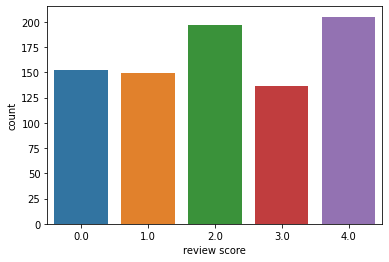

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df.hate_type2)
plt.xlabel('review score');

In [ ]:
train_df['race'].value_counts()

0    627
1    119
Name: race, dtype: int64

In [ ]:
RANDOM_SEED = 41
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
test_df

,file_name,meme_type,hate_type,meme_type2,hate_type2,text
218,img240.jpg,hate_speech,national_origin,0.0,2.0,وأخيرا السعودية تسمح للنساء بقيادة السيارة
319,img323.jpg,hate_speech,gender,0.0,4.0,شاب البنات ولا مرة رح يعرفوا قديش صعب الواحد ي...
832,img1169.png,hate_speech,religion,0.0,0.0,داعشي مسلم يقوم بشق عنق كافر اخر
962,img1310.png,hate_speech,national_origin,0.0,2.0,الذي يجعلك تشعر باقصى درجات المحنة
455,img457.jpg,hate_speech,race,0.0,3.0,لجمع الاغراض المدرسية لجمع النقود لجمع العرب
...,...,...,...,...,...,...
123,img111.jpg,hate_speech,national_origin,0.0,2.0,مواطن اردني يهاجر هو ايضا بعدما وصل لوجهته هل ...
361,img369.jpg,hate_speech,race,0.0,3.0,عندما تشعر بالوحدة ثم تشتري آسيويين من الشبكة ...
704,img1034.jpg,hate_speech,race,0.0,3.0,الزنوج البشرة اليبضاء
248,img268.png,hate_speech,gender,0.0,4.0,الناس الي بتفكر انه النسوية هي كره للرجال


In [ ]:
LABELS = ['religion','ddd','national_origin','race','gender']
one_hot_encoded = pd.get_dummies(df.hate_type2, columns=LABELS)


In [ ]:
train_df = pd.concat([ train_df.text, one_hot_encoded], axis=1, join='inner')
train_df.columns = ['text'] + LABELS
test_df = pd.concat([ test_df.text, one_hot_encoded], axis=1, join='inner')
test_df.columns = ['text'] + LABELS

In [ ]:
train_df


,text,religion,ddd,national_origin,race,gender
985,عندما تعود للمنزل بعدما التنمر عليك لأنك اعمى,0,1,0,0,0
158,علما تحاصرك الشرطة الأمريكية ثم تتذكر أنك أفغاني,0,0,1,0,0
707,انا لست عنصري ظلي اسود,0,0,0,1,0
876,كل هؤلاء الاناس البيض يجعلوني اشتاق لهيروشيما,0,0,0,1,0
681,عندما يوم الناس بالتثاؤب هل يظن الاطرش انهم يص...,0,1,0,0,0
...,...,...,...,...,...,...
80,لما طلاب التحفيظ يطلبوا رحلة للمسبح المدرس الا...,1,0,0,0,0
994,حيوانات مصابة بمتلازمة داون المنغولية,0,1,0,0,0
908,عندما تقوم بضرب زوجتك لإجبارها على الاجهاض وتر...,0,0,0,1,0
931,عندما يقوم الفتى المعاق بلمسك,0,1,0,0,0


In [ ]:
print(len(test_df))
print(len(train_df))

93
746


In [ ]:
token_lens = [] 
def  calcualte_seq_length(df):
  for txt in df.text:
    tokens = txt.split()
    token_lens.append(len(tokens))
  return token_lens




In [ ]:
max_sentence_len = 32
sns.distplot(token_lens)

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, GRU, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential
from sklearn.metrics import f1_score, jaccard_score


# Load pretrained model


In [ ]:
!gdown 1P5hDh2pTeZn8-ZNdsoRjHI9V-_z24U5F

In [ ]:
import gensim 
import numpy as np

class embed(object):
    def __init__(self, path):
        self.path = path
        self._load_model()
        
    def _load_model(self):
        self.model = gensim.models.Word2Vec.load(self.path)
        self.vector_size = self.model.vector_size

    def _embed_single(self, text, max_len):
        embedding = [self.model.wv[i].reshape(-1, self.vector_size) for i in text.split() if i in self.model.wv]
        if len(embedding) == 0:
            return self._pad(np.zeros((1, self.vector_size)), max_len)
        embedding = np.concatenate(embedding, axis=0)
        return self._pad(embedding, max_len)
                    
    def embed_batch(self, text_list, max_len):
        batch = [self._embed_single(i, max_len) for i in text_list]
        return np.concatenate(batch)
    
    def _pad(self, array, max_len):
        if array.shape[0] >= max_len:
            return np.expand_dims(array[:max_len],0)
        else:
            padding_size = max_len - array.shape[0]
            return np.expand_dims(np.pad(array, [(0, padding_size), (0, 0)], mode='constant', constant_values=0), 0)

In [ ]:
!unzip '/content/full_uni_cbow_300_twitter.zip'

In [ ]:
# Load Aravec 
embedd_path = '/content/full_uni_cbow_300_twitter.mdl'
embedd_size = 300

embedder = embed(embedd_path)

In [ ]:
model_path = '/content/bi_lstm.best.hdf5'

In [ ]:
X_train = np.array(train_df.text)
Y_train = train_df[train_df.columns[1:]] .values

X_test = np.array(test_df.text)
Y_test = test_df[test_df.columns[1:]].values

# Text Vectorization

In [ ]:
X_train = embedder.embed_batch(X_train, max_sentence_len)
X_test = embedder.embed_batch(X_test, max_sentence_len)

In [ ]:
X_train[1]

array([[-1.59730077, -1.3827641 ,  1.41903377, ..., -0.54037917,
        -0.41351718, -1.19467378],
       [ 0.18917535,  0.21022914,  0.27649844, ...,  0.67310119,
        -0.29622129,  0.85761559],
       [-0.79382247,  2.16114664,  0.74110085, ..., -0.12027304,
         0.22823174, -0.84119111],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# Create & Train model

In [ ]:
def create_model(max_sentence_len, embedd_size, num_labels=5):
    sentence = keras.Input(shape=(max_sentence_len, embedd_size), name='sentence')
    forward_layer = GRU(300)
    backward_layer = GRU(300, go_backwards=True)

    model = Sequential()
    model.add(sentence)
    
    model.add(Bidirectional(forward_layer, backward_layer=backward_layer))
    model.add(Dense(300, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_labels, activation='softmax'))
    model.compile(optimizer=Adam(0.009), loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
earlystopping_callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=model_path,
    monitor='val_accuracy',
    mode='max',
    save_weights_only=True,
    save_best_only=True,
    verbose=1)

In [ ]:
model = create_model(max_sentence_len, embedd_size)
history = model.fit(X_train,
          Y_train,
          epochs=20,
          batch_size=15,
          validation_data = (X_test, Y_test),
          shuffle=True, 
          callbacks=[earlystopping_callback, checkpoint_callback])

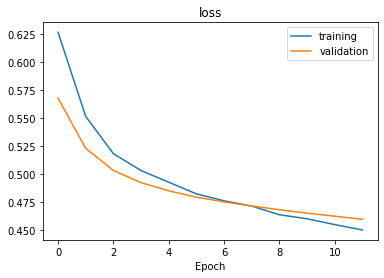

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('Epoch')
plt.show()

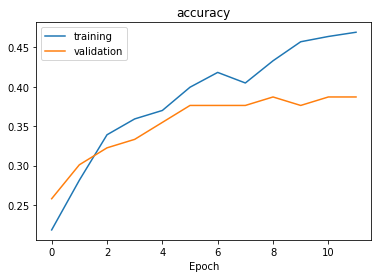

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
preds = model.predict(X_test) > 0.5

print("F1 macro:   {}".format(round(f1_score(Y_test, preds, average="macro"), 3)))
print("F1 micro:   {}".format(round(f1_score(Y_test, preds, average="micro"), 3)))
print("Recall: {}".format(round(recall_score(Y_test, preds, average="macro"), 3)))
print("Precision: {}".format(round(precision_score(Y_test, preds, average="macro"), 3)))